Absolutely! Here’s a polished and informative Introduction section you can include in your GitHub project README or at the top of your Jupyter notebook:

⸻

🧭 Introduction: Driven Damped Pendulum & Chaos

This project simulates the driven, damped pendulum — a classic system in nonlinear dynamics that exhibits a rich variety of behaviors, from simple periodic motion to deterministic chaos.

The pendulum is governed by the nonlinear second-order differential equation:

\frac{d^2x}{dt^2} + a\frac{dx}{dt} + \sin(x) = f \cos(\omega t)

Where:
	•	x(t): angular displacement (in radians)
	•	a: damping coefficient
	•	f: driving force amplitude
	•	\omega: driving frequency

We reduce the equation to a system of first-order ODEs and solve it numerically using Euler’s method, a simple time-stepping approach suitable for exploring qualitative behavior.

⸻

🎯 Goals of This Simulation
	1.	Understand how damping and external forcing affect pendulum dynamics
	2.	Explore multiple dynamical regimes:
	•	Undamped, undriven (ideal pendulum)
	•	Damped, undriven (exponential decay to rest)
	•	Damped and periodically driven (which can become chaotic)
	3.	Visualize motion using time series, phase diagrams, and Poincaré sections
	4.	Compare regular vs. chaotic behavior under small changes in parameters

⸻

🔍 What We Did
	•	Built a modular Python simulator to solve the equations for arbitrary initial conditions and parameters
	•	Implemented clean, clear visualizations:
	•	Time evolution of angle x(t)
	•	Phase space trajectories (x, v)
	•	Marker-based phase plots for fine chaotic structure (inspired by your original CPP2 notebook)
	•	Poincaré sections to identify chaotic attractors
	•	Explored three distinct cases:
	•	Undamped, undriven: periodic orbits (energy conserved)
	•	Damped, undriven: motion decays to rest
	•	Damped + driven: depending on f and \omega, we observed regular oscillations or chaotic motion with no repeating pattern

⸻

🔬 What We Found
	•	The system is highly sensitive to initial conditions and parameters.
	•	For certain values (e.g., a = 0.2, f = 0.52, \omega = 0.99), the pendulum exhibits chaotic behavior:
	•	The phase space shows a strange attractor — not a single orbit, but a dense region.
	•	The Poincaré section reveals a scattered set of points, rather than neat loops — a signature of chaos.
	•	This makes the driven damped pendulum an ideal testbed for understanding deterministic chaos, one of the foundational concepts in nonlinear physics.

⸻

Let me know if you’d like a Markdown .md version of this, or want to add a few animated plots or GIFs for your GitHub repo!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_pendulum(a=0.0, f=0.0, w=0.0, x0=np.pi/4, v0=0.0, dt=0.01, total_time=100.0):
    """
    Simulate a nonlinear pendulum using Euler's method.

    Parameters:
        a : damping coefficient
        f : driving force amplitude
        w : driving frequency
        x0: initial angular position (radians)
        v0: initial angular velocity (rad/s)
        dt: time step
        total_time: total simulation time

    Returns:
        t_vals: array of time points
        x_vals: angle values over time
        v_vals: velocity values over time
    """
    steps = int(total_time / dt)
    t_vals = np.linspace(0, total_time, steps)
    x_vals = np.zeros(steps)
    v_vals = np.zeros(steps)

    x_vals[0] = x0
    v_vals[0] = v0

    def dxdt(v): return v
    def dvdt(x, v, t): return -np.sin(x) - a * v + f * np.cos(w * t)

    for i in range(1, steps):
        t = t_vals[i - 1]
        x = x_vals[i - 1]
        v = v_vals[i - 1]

        x_new = x + dt * dxdt(v)
        v_new = v + dt * dvdt(x, v, t)

        x_new = (x_new + np.pi) % (2 * np.pi) - np.pi  # Keep in [-π, π]

        x_vals[i] = x_new
        v_vals[i] = v_new

    return t_vals, x_vals, v_vals

In [3]:
def plot_time_series(t, x, title="Angular Displacement vs. Time"):
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Angle x (radians)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_phase_space(x, v, title="Phase Space: Velocity vs. Angle"):
    plt.figure(figsize=(6, 6))
    plt.plot(x, v, color='darkred')
    plt.title(title)
    plt.xlabel('Angle x (radians)')
    plt.ylabel('Angular Velocity v (rad/s)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_phase_marker(x, v, title="Phase Diagram (dots)", marker_color='r'):
    plt.figure(figsize=(6, 6))
    plt.plot(x, v, marker_color + '.', markersize=0.1)
    plt.title(title)
    plt.xlabel('Angle x (radians)')
    plt.ylabel('Angular Velocity v (rad/s)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_poincare_section(t, x, v, omega, dt):
    """
    Plot the Poincaré section: sampled (x, v) once per driving period.
    """
    T = 2 * np.pi / omega
    step_interval = int(T / dt)
    x_points = []
    v_points = []

    for i in range(step_interval, len(t), step_interval):
        x_points.append(x[i])
        v_points.append(v[i])

    plt.figure(figsize=(6, 6))
    plt.plot(x_points, v_points, 'ko', markersize=2)
    plt.title("Poincaré Section")
    plt.xlabel("Angle x (radians)")
    plt.ylabel("Angular Velocity v (rad/s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

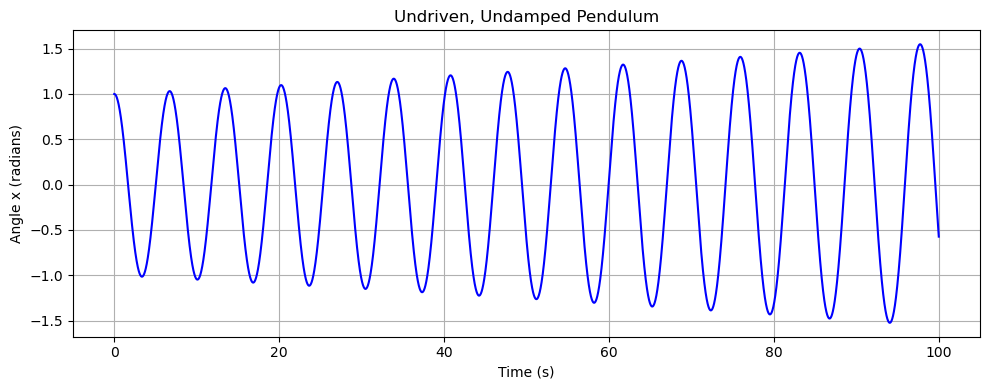

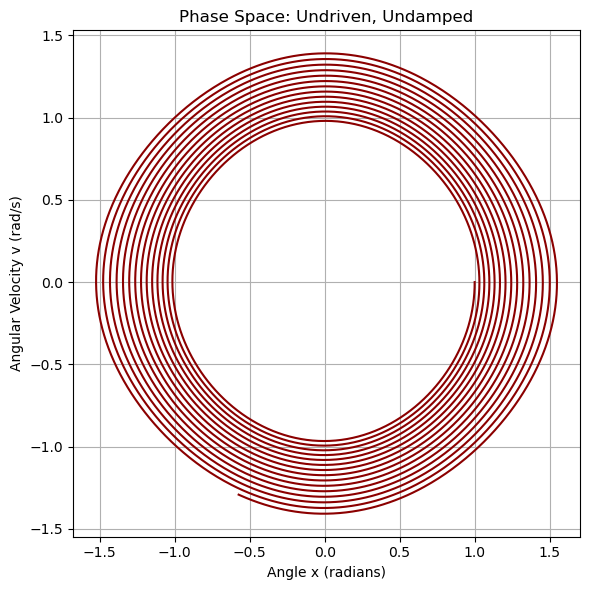

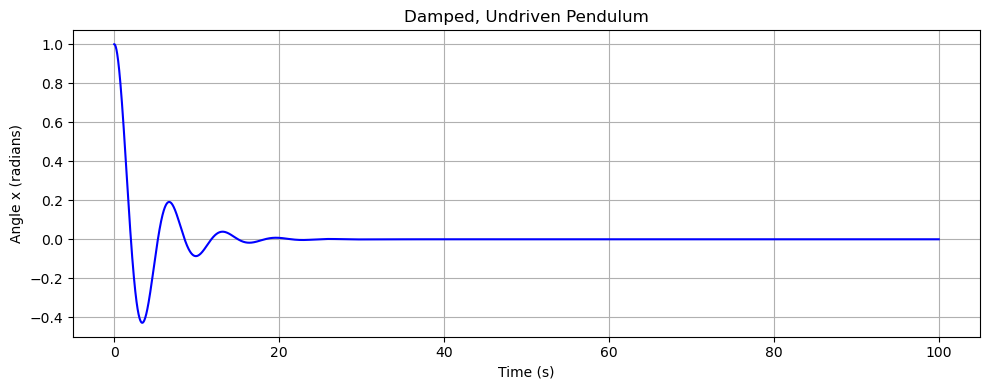

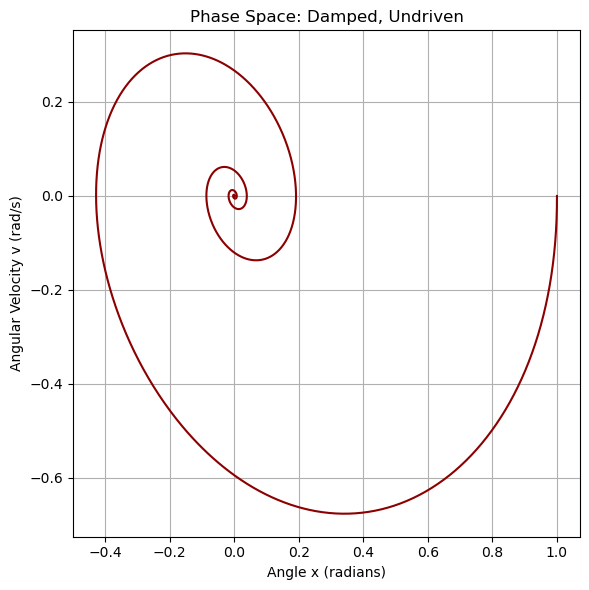

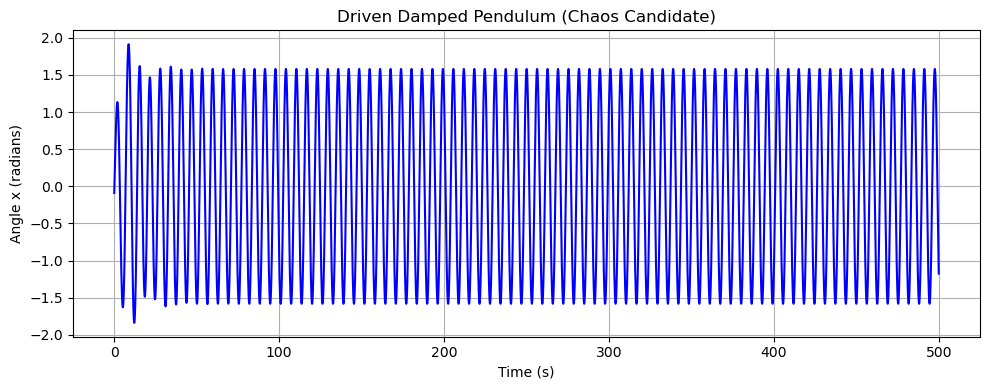

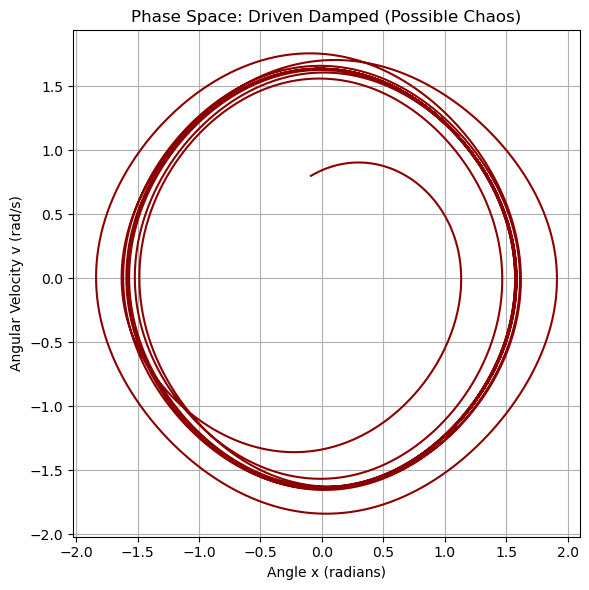

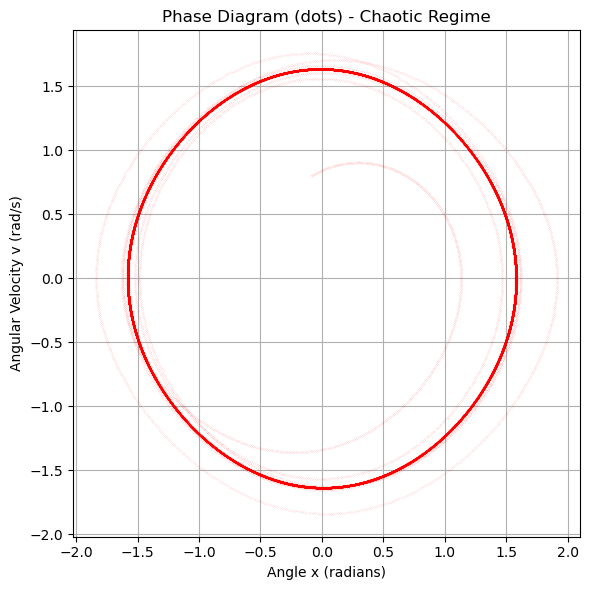

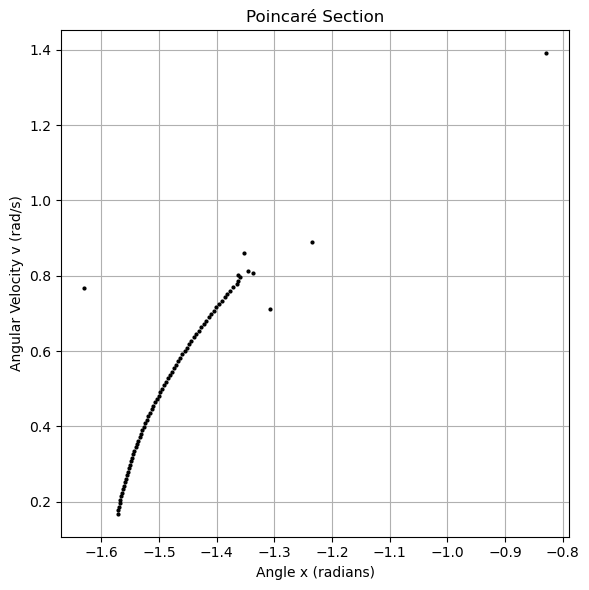

In [4]:
# Undamped, Undriven (conservative system)
t1, x1, v1 = simulate_pendulum(a=0.0, f=0.0, w=0.0, x0=1.0)
plot_time_series(t1, x1, title="Undriven, Undamped Pendulum")
plot_phase_space(x1, v1, title="Phase Space: Undriven, Undamped")

# Damped, Undriven
t2, x2, v2 = simulate_pendulum(a=0.5, f=0.0, w=0.0, x0=1.0)
plot_time_series(t2, x2, title="Damped, Undriven Pendulum")
plot_phase_space(x2, v2, title="Phase Space: Damped, Undriven")

# Damped + Driven (chaotic candidate)
t3, x3, v3 = simulate_pendulum(a=0.2, f=0.52, w=0.99, x0=-0.0888, v0=0.8, total_time=500)
plot_time_series(t3, x3, title="Driven Damped Pendulum (Chaos Candidate)")
plot_phase_space(x3, v3, title="Phase Space: Driven Damped (Possible Chaos)")
plot_phase_marker(x3, v3, title="Phase Diagram (dots) - Chaotic Regime")
plot_poincare_section(t3, x3, v3, omega=0.99, dt=0.01)